In [2]:
import json

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

import numpy as np

import openturns as ot
import openturns.viewer as viewer
import openturns.viewer as otv

plt.rcParams['figure.dpi']= 500

# Import Data

In [10]:
# Hot leg and Cold leg
dataset_HL = ot.Sample.ImportFromCSVFile('../data/DataSet_HL.csv')

In [35]:
# Time indices in days
t = [i*250 for i in range(75)]

In [36]:
# Clogging output as a function of time
outputSample = dataset_HL[:,7:]

In [42]:
np.asarray(outputSample).shape

(969, 75)

In [37]:
# Parameters of the Steam Generator
input_dic = {}
input_dic['SG'] = json.load(open('../data/data.json'))

In [38]:
# Color scheme for chemical conditioning
colors_ch = {'Morpholine': {'9.2': ['g', 0.05], '9.6': ['g', 0.2]},
             'ETA': {'9.2': ['b', 0.05], '9.6': ['b', 0.2]},
             'Ammoniaque' : {'9.2': ['r', 0.05], '9.7': ['r', 0.2]}}

# Plot of the trajectories for the Hot Leg

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


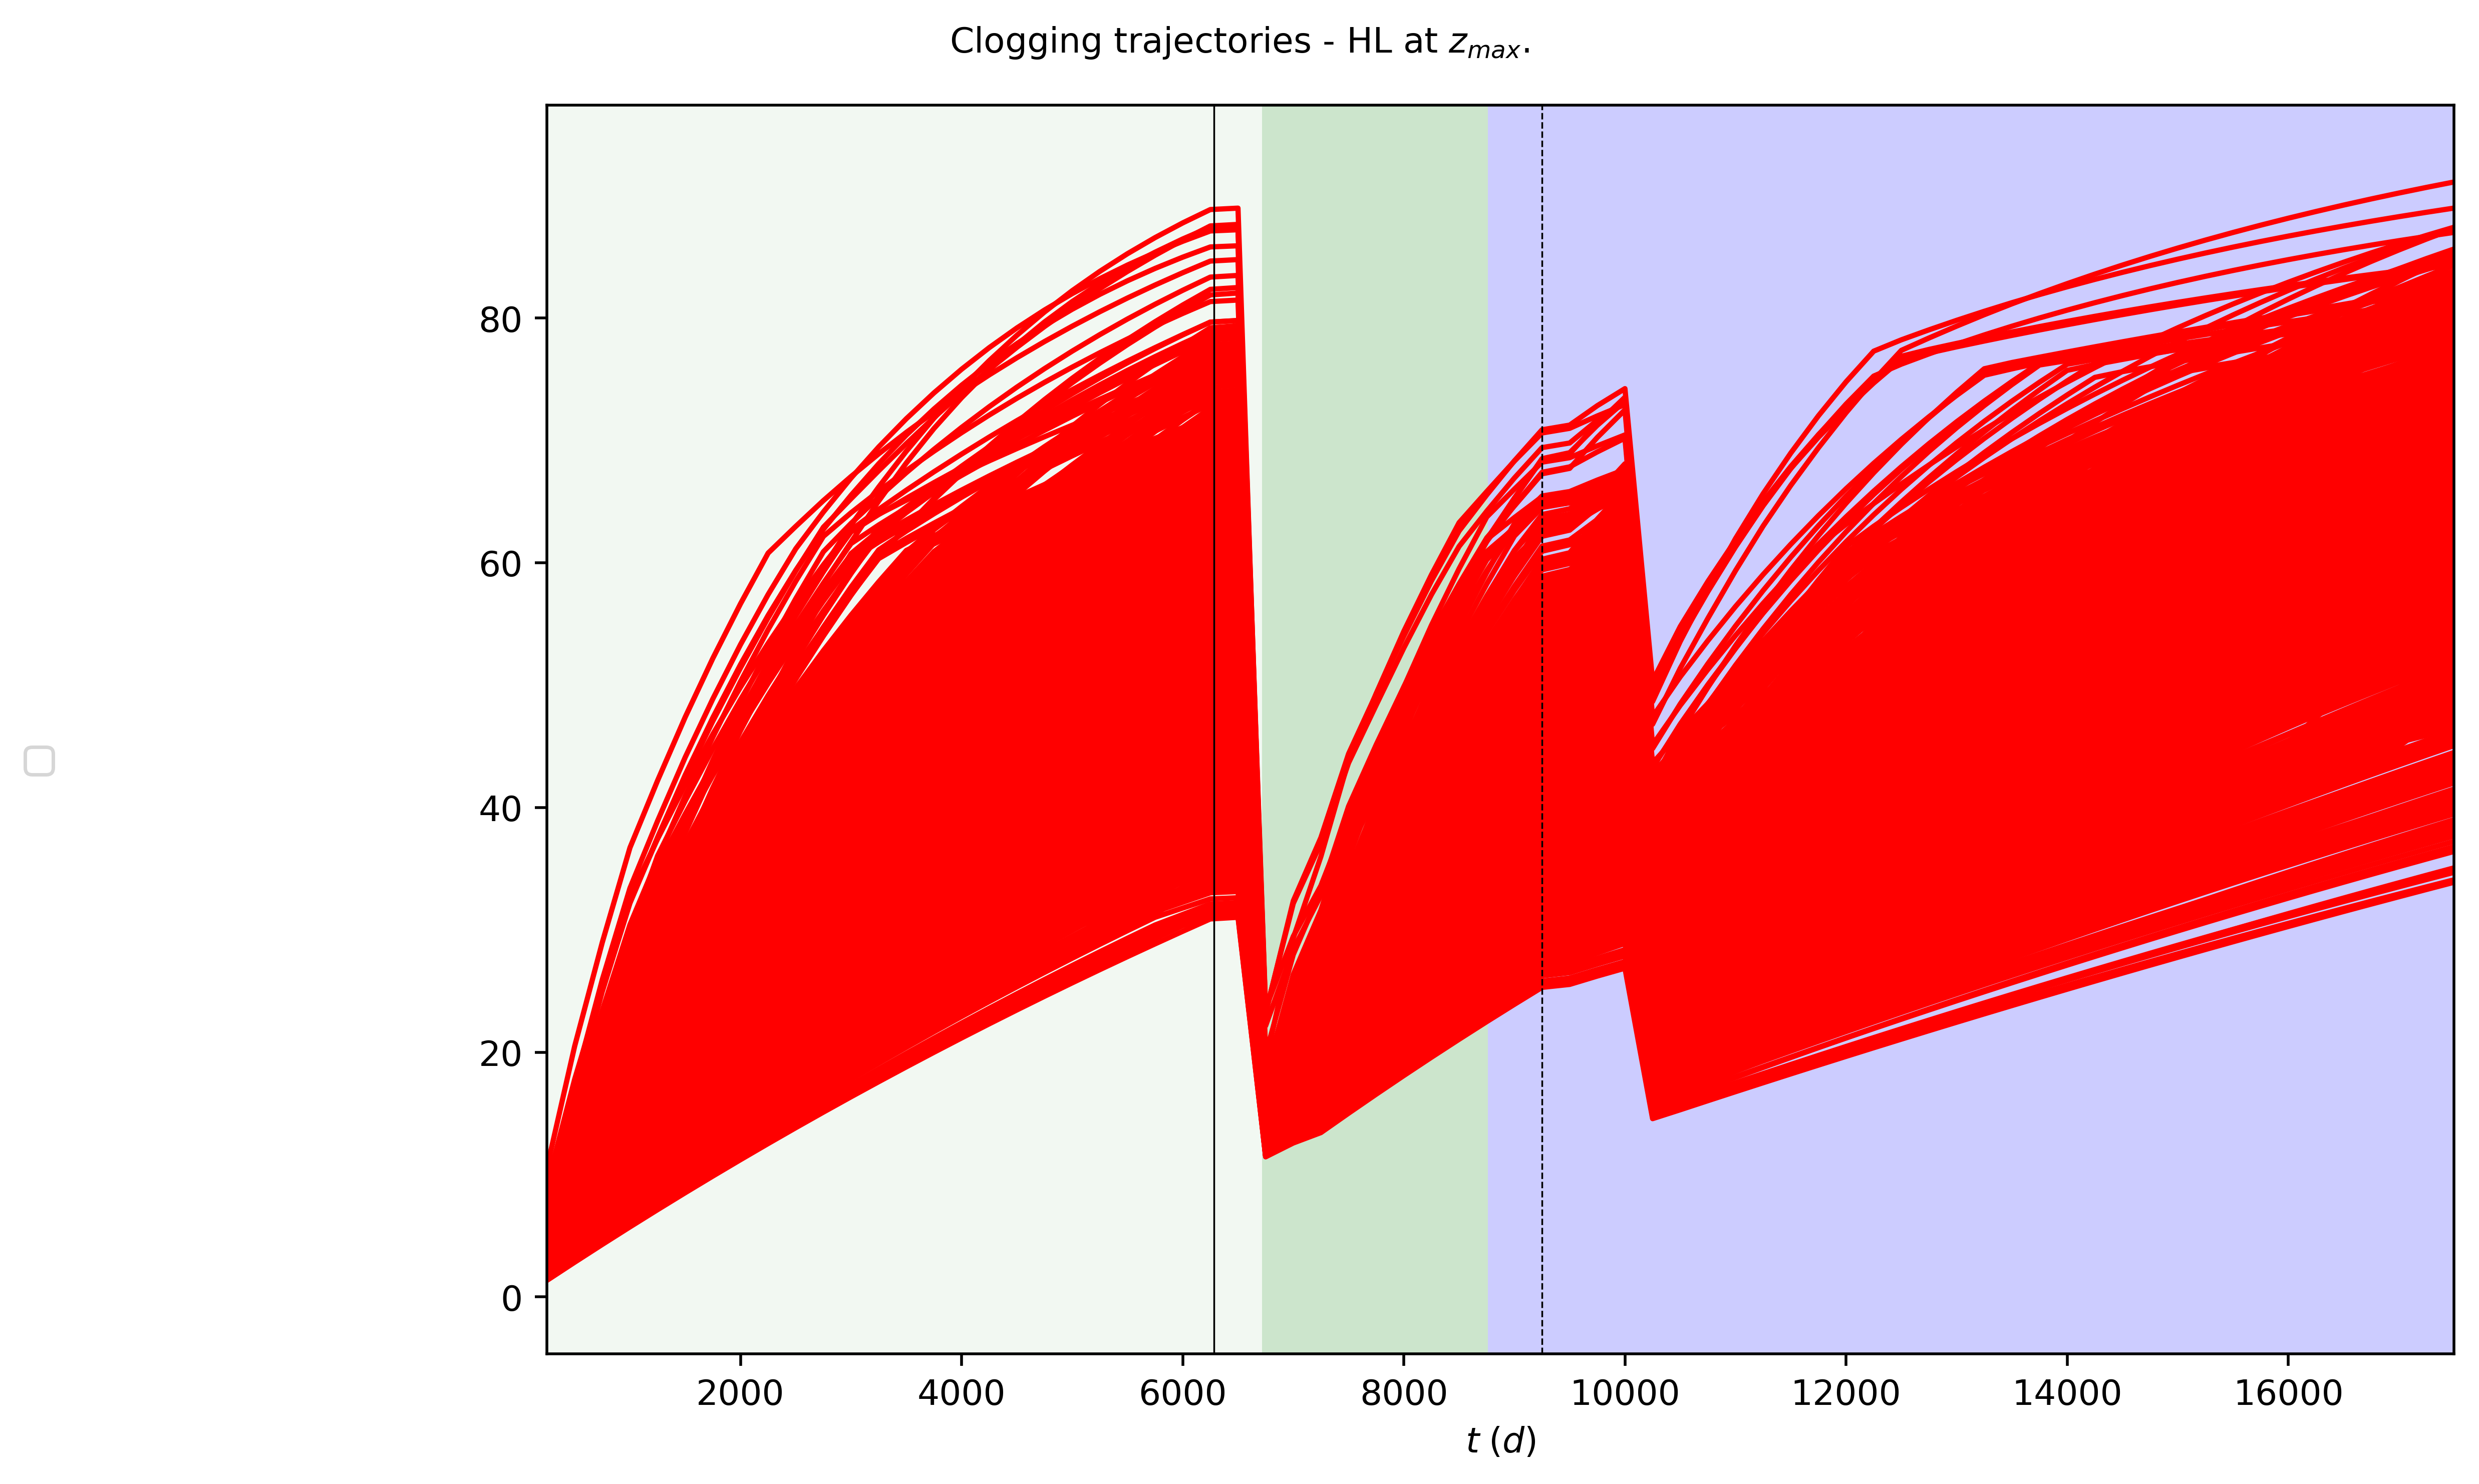

In [41]:
#Plot for different 
nrow, ncol = 1, 1
fig, axs = plt.subplots(nrow, ncol, figsize=(10,6), layout='tight')

cond = input_dic['SG']['chimie']['conditionnementSecondaire']
for k in range(len(cond)):
    if k == len(cond)-1:
        t_i, t_f = cond[k]['nbHeuresExploit']/24, max(t)
    else:
        t_i, t_f = cond[k]['nbHeuresExploit']/24, cond[k+1]['nbHeuresExploit']/24
    c = cond[k]
    typ = colors_ch[c['type']]
    col = typ[str(c['ph'])]
    axs.axvspan(t_i, t_f, facecolor=col[0], alpha = col[1])

for i in range(969):
    axs.plot(t,np.asarray([0] + list(outputSample[i])), c='r')
axs.set_xlim(250,17500)
axs.set_xlabel(r'$t\;(d)$')

nett = input_dic['SG']['chimie']['nettoyage']
for k in range(len(nett)):
    if nett[k]['type'] == 'curatif':
        axs.axvline(x=nett[k]['nbHeuresExploit']/24, color = 'k', linestyle='-', linewidth=0.5)

    elif nett[k]['type'] == 'preventif':
        axs.axvline(x=nett[k]['nbHeuresExploit']/24, color = 'k', linestyle='--', linewidth=0.5)

axs.legend(bbox_to_anchor=(-0.25,0.5))

fig.suptitle(r'Clogging trajectories - HL at $z_{max}$.', fontsize=10)
fig.savefig('../plots/TPD/TPD_MC_trajectories.pdf', format='pdf')
fig.savefig('../plots/TPD/TPD_MC_trajectories.png', format='png')

        